Datasets source : https://www.kaggle.com/christophercorrea/dc-residential-properties

Dataset : DC_Properties.csv

Key-variabls:
- <b>PRICE</b>: Price of most recent sale (Numeric/Target variable)
- <b>X</b>: longitude (Numeric/non-linear relationship)
- <b>Y</b>: latitude (Numeric/non-linear relationship)
- <b>LANDAREA</b>: Land area of property in square feet (Numeric)
- <b>GBA</b>: Gross building area in square feet (Numeric)
- <b>LIVING_GBA</b>: Gross building area in square feet
- <b>BATHRM</b>: Number of bathrooms (Count)
- <b>ROOMS</b>: Number of Rooms (Count)
- <b>KITCHENS</b>: Number of kitchens (Count)
- <b>BEDRM</b>: Number of Bedrooms (Count)
- <b>CNDTN</b>: Condition (Categorical)

Relevant-variables:
- <b>STYLE</b>: Style




Other-variables:

- <b>LATITUDE</b>: Latitude
- <b>LONGITUDE</b>: Longitude
- <b>HF_BATHRMNumber</b>: of Half Bathrooms (no bathtub or shower)
- <b>HEAT</b>: Heating
- <b>AC</b>: Cooling
- <b>NUM_UNITS</b>:Number of Units
- <b>AYB</b>: The earliest time the main portion of the building was built
- <b>YR_RMDL</b>: Year structure was remodeled
- <b>EYB</b>: The year an improvement was built more recent than actual year built
- <b>STORIES</b>: Number of stories in primary dwelling
- <b>SALEDATE</b>: Date of most recent sale
- <b>QUALIFIED</b>: Qualified
- <b>SALE_NUM</b>: Sale Number
- <b>BLDG_NUM</b>: Building Number on Property
- <b>STRUCT</b>: Structure
- <b>GRADE</b>: Grade
- <b>EXTWALL</b>: Extrerior wall
- <b>ROOF</b>: Roof type
- <b>INTWALL</b>: Interior wall
- <b>FIREPLACES</b>: Number of fireplaces
- <b>USECODE</b>: Property use code
- <b>GIS_LAST_MOD_DTTM</b>: Last Modified Date
- <b>SOURCE</b>: Raw Data Source
- <b>CMPLX_NUM</b>: Complex number
- <b>FULLADDRESS</b>: Full Street Address
- <b>CITY</b>: City
- <b>STATE</b>: State
- <b>ZIPCODE</b>: Zip Code
- <b>NATIONALGRID</b>: Address location national grid coordinate spatial address
- <b>ASSESSMENT_NBHD</b>: Neighborhood ID
- <b>ASSESSMENT_SUBNBHD</b>: Subneighborhood ID
- <b>CENSUS_TRACT</b>: Census tract
- <b>CENSUS_BLOCK</b>: Census block
- <b>WARD</b>: Ward (District is divided into eight wards, each with approximately 75,000 residents)
- <b>SQUARE</b>: Square (from SSL)
- <b>QUADRANT</b>: City quadrant (NE,SE,SW,NW)

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns
df = pd.read_csv('../Data/DC_Properties.csv')
print(df.shape)

(158957, 49)


C:\Users\Sverrir\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Helper functions

In [104]:
# Return range of non-outleries based on outliers being outside Q1 - IQR*1.5 and Q3 + IQR*1.5
def outlier_range(tmp_df,coeff = 1.5,verbose=False):
    tmp_df = tmp_df.copy().dropna()
    Q1 = tmp_df.dropna().quantile(0.25)
    Q3 = tmp_df.dropna().quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - IQR*coeff
    upper = Q3 + IQR*coeff
    df_filt = tmp_df.copy()
    df_filt = df_filt[(df_filt>lower) & (df_filt<upper)]
    if verbose:
        print('persentage of data removed:',100*np.round(1-(len(df_filt)/len(tmp_df)),3))
    return (np.min(df_filt),np.max(df_filt))

In [29]:
pd.set_option('display.max_columns', 500)

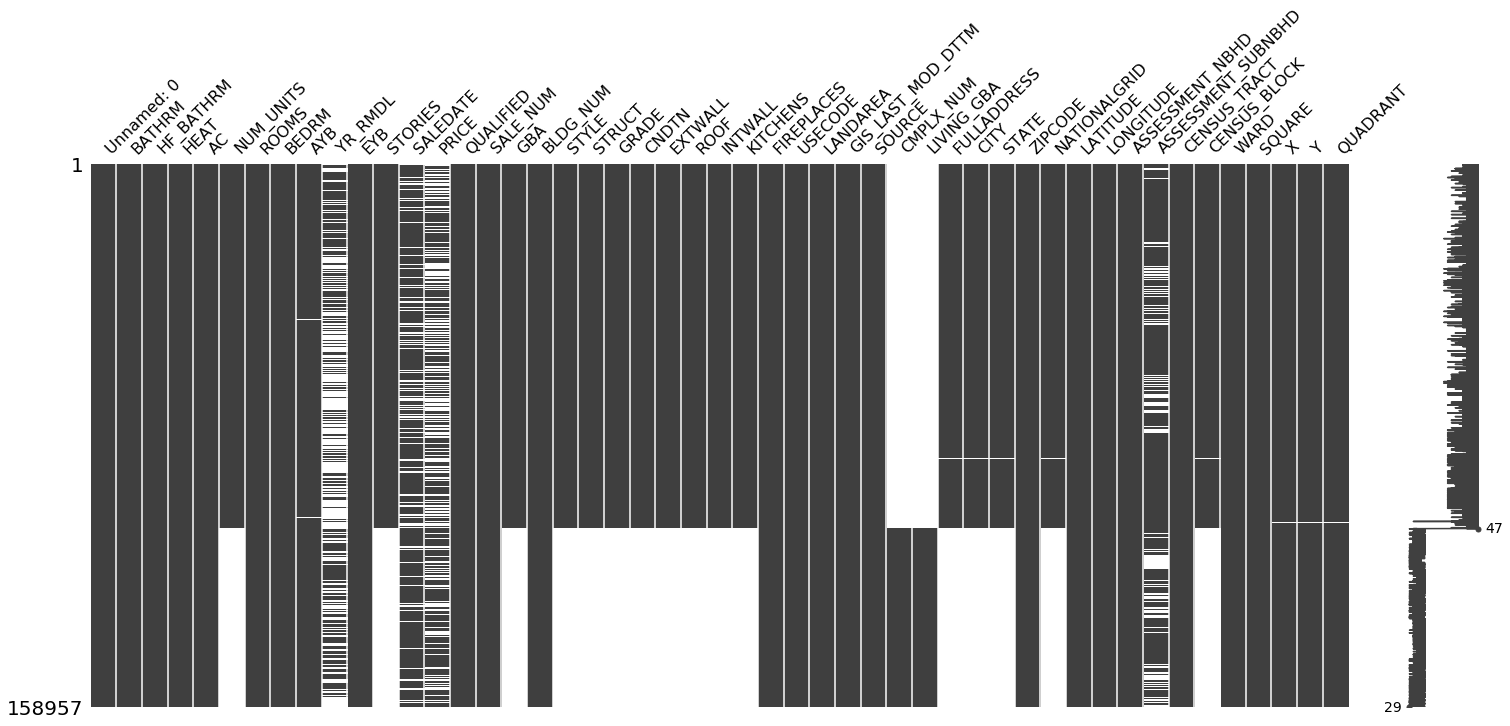

In [30]:
from missingno import matrix
matrix(df)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          158957 non-null  int64  
 1   BATHRM              158957 non-null  int64  
 2   HF_BATHRM           158957 non-null  int64  
 3   HEAT                158957 non-null  object 
 4   AC                  158957 non-null  object 
 5   NUM_UNITS           106696 non-null  float64
 6   ROOMS               158957 non-null  int64  
 7   BEDRM               158957 non-null  int64  
 8   AYB                 158686 non-null  float64
 9   YR_RMDL             80928 non-null   float64
 10  EYB                 158957 non-null  int64  
 11  STORIES             106652 non-null  float64
 12  SALEDATE            132187 non-null  object 
 13  PRICE               98216 non-null   float64
 14  QUALIFIED           158957 non-null  object 
 15  SALE_NUM            158957 non-nul

In [32]:
df.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [33]:
room_vars = ['BATHRM','HF_BATHRM','BEDRM','KITCHENS']
# plt.plot(sorted(df.loc[:,'ROOMS'])
# plt.plot(sorted(df.loc[:,room_vars].sum(axis='columns')))


In [34]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [35]:
df_rooms = df.loc[:,room_vars+['PRICE']].dropna()

In [36]:
X = df_rooms.loc[:,room_vars[:-1]]
y = df_rooms.loc[:,'PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [37]:
print(len(X_train))

52109


In [38]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred_test = reg.predict(X_test)
y_pred_train = reg.predict(X_train)
print('test score:',r2_score(y_test,y_pred_test))
print('train score:',r2_score(y_train,y_pred_train))

test score: 0.32503818165412635
train score: 0.29066270830583674


In [39]:
reg.coef_

array([257098.85819424, 206361.48853164,  25893.7100094 ])

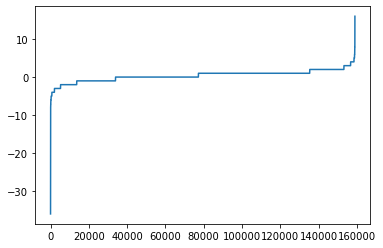

In [40]:
plt.plot(sorted(df.loc[:,'ROOMS'] - df.loc[:,room_vars].sum(axis='columns')))
# plt.plot(sorted())

### Analyze difference in distributions between residential and condominium properties

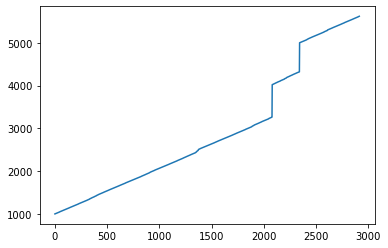

In [41]:
plt.plot(sorted(df.CMPLX_NUM.unique()))

### Date variables

In [42]:
date_vars = ['SALEDATE','GIS_LAST_MOD_DTTM']
for col in date_vars:
    df.loc[:,col] = pd.to_datetime(df.loc[:,col],format='%Y-%m-%d %H:%M:%S')
    
df.loc[:,date_vars].iloc[:3]

,SALEDATE,GIS_LAST_MOD_DTTM
0,2003-11-25,2018-07-22 18:01:43
1,2000-08-17,2018-07-22 18:01:43
2,2016-06-21,2018-07-22 18:01:43


### Other and useless variables

In [43]:
useless_vars = ['ZIPCODE','CENSUS_BLOCK','CENSUS_TRACT','SQUARE','BLDG_NUM']
other_vars = ['FULLADDRESS','CITY','X','Y','NATIONALGRID','CMPLX_NUM','STATE']

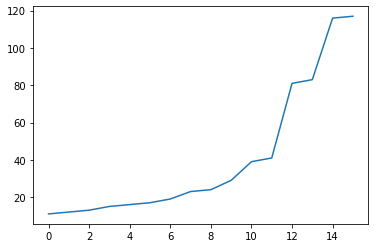

In [44]:
plt.plot(sorted(df.USECODE.unique()))

### Region variables

In [124]:
df.iloc[:2]

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4.0,0.0,Warm Cool,Y,2.0,8.0,4.0,1910.0,1988.0,1972.0,3.0,2003-11-25,1095000.0,Q,1.0,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5.0,24,1680.0,2018-07-22 18:01:43,Residential,NaN,NaN,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3.0,1.0,Warm Cool,Y,2.0,11.0,5.0,1898.0,2007.0,1972.0,3.0,2000-08-17,NaN,U,1.0,2567.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,4.0,24,1680.0,2018-07-22 18:01:43,Residential,NaN,NaN,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [126]:
loc_vars = ['']
region_vars = ['ASSESSMENT_NBHD','ASSESSMENT_SUBNBHD','WARD','QUADRANT']

### Categorical variables

In [127]:
cat_vars = ['HEAT','AC','QUALIFIED','STYLE','STRUCT',
            'GRADE','CNDTN','EXTWALL','ROOF','INTWALL','USECODE']

df.loc[:,cat_vars] = df.loc[:,cat_vars].astype('category')
df.loc[:,cat_vars].iloc[:3]

,HEAT,AC,QUALIFIED,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,USECODE
0,Warm Cool,Y,Q,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,24
1,Warm Cool,Y,U,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,24
2,Hot Water Rad,Y,Q,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,24


In [112]:
for col in cat_vars:
    print(len(df.loc[:,col].unique()))
    print(df.loc[:,col].unique())

14
[Warm Cool, Hot Water Rad, Forced Air, Elec Base Brd, Ht Pump, ..., Air Exchng, No Data, Ind Unit, Gravity Furnac, Air-Oil]
Length: 14
Categories (14, object): [Warm Cool, Hot Water Rad, Forced Air, Elec Base Brd, ..., No Data, Ind Unit, Gravity Furnac, Air-Oil]
3
[Y, N, 0]
Categories (3, object): [Y, N, 0]
2
[Q, U]
Categories (2, object): [Q, U]
19
[3 Story, 4 Story, 2 Story, 2.5 Story Fin, 3.5 Story Fin, ..., Split Foyer, Vacant, Outbuildings, 4.5 Story Unfin, NaN]
Length: 19
Categories (18, object): [3 Story, 4 Story, 2 Story, 2.5 Story Fin, ..., Split Foyer, Vacant, Outbuildings, 4.5 Story Unfin]
10
[Row Inside, Semi-Detached, Single, Row End, Multi, Town Inside, Town End, Default, Vacant Land, NaN]
Categories (9, object): [Row Inside, Semi-Detached, Single, Row End, ..., Town Inside, Town End, Default, Vacant Land]
14
[Very Good, Above Average, Good Quality, Excellent, Average, ..., Low Quality, Exceptional-A, Exceptional-B, No Data, NaN]
Length: 14
Categories (13, object): [Ve

### Integer variables (counted variables)


In [46]:
integer_vars = ['BATHRM','HF_BATHRM','NUM_UNITS','ROOMS',
                'BEDRM','SALE_NUM',
                'KITCHENS','FIREPLACES','STORIES']
df.loc[:,integer_vars] = df.loc[:,integer_vars].astype(float)
df.loc[:,integer_vars].iloc[:3]

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,SALE_NUM,KITCHENS,FIREPLACES,STORIES
0,4.0,0.0,2.0,8.0,4.0,1.0,2.0,5.0,3.0
1,3.0,1.0,2.0,11.0,5.0,1.0,2.0,4.0,3.0
2,3.0,1.0,2.0,9.0,5.0,3.0,2.0,4.0,3.0


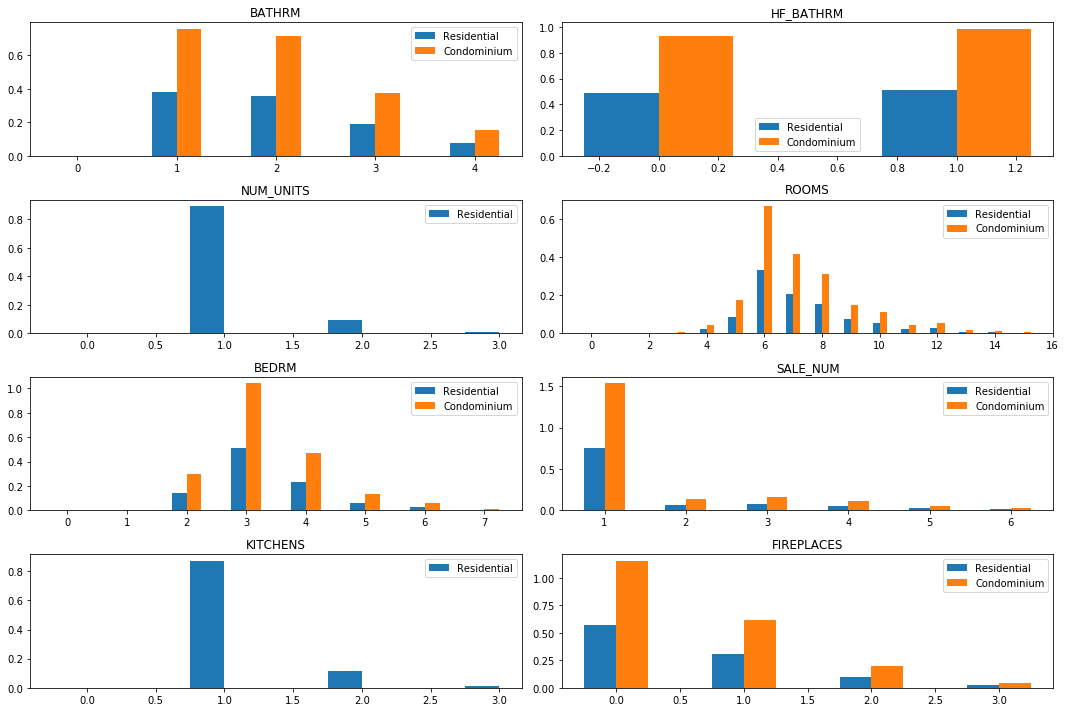

In [107]:
f,axes = plt.subplots(len(integer_vars)//2,2,figsize=(15,10))
axes = np.ravel(axes)
for ax,col in zip(axes,integer_vars):
#     print(col)
    tmp_data = df.loc[:,col]
    tmp_data = tmp_data[tmp_data < tmp_data.quantile(0.995)]
    tmp_data_cond = tmp_data.loc[df.loc[:,'SOURCE'] == 'Residential']
    tmp_data_res = tmp_data.loc[df.loc[:,'SOURCE'] == 'Condominium']
    cond_counts = tmp_data_cond.value_counts()
    res_counts = tmp_data_res.value_counts()
    width = 0.5
    if len(tmp_data_cond) > 0:
        ax.bar(cond_counts.index-width/4,cond_counts/len(tmp_data_cond),width=width/2)
    if len(tmp_data_res) > 0:
        ax.bar(cond_counts.index+width/4,cond_counts/len(tmp_data_res),width=width/2)
    
    ax.legend(['Residential','Condominium'])
    ax.set_title(col)
    
plt.tight_layout()
plt.show()

### Float variables (continuous )


In [93]:
float_vars = ['LATITUDE','LONGITUDE','PRICE','GBA','LIVING_GBA','LANDAREA','AYB','YR_RMDL','EYB']
df.loc[:,float_vars] = df.loc[:,float_vars].astype(float)
df.loc[:,float_vars].iloc[:3]

,LATITUDE,LONGITUDE,PRICE,GBA,LIVING_GBA,LANDAREA,AYB,YR_RMDL,EYB
0,38.914680,-77.040832,1095000.0,2522.0,NaN,1680.0,1910.0,1988.0,1972.0
1,38.914683,-77.040764,NaN,2567.0,NaN,1680.0,1898.0,2007.0,1972.0
2,38.914684,-77.040678,2100000.0,2522.0,NaN,1680.0,1910.0,2009.0,1984.0


persentage of data removed: 0.0
persentage of data removed: 0.0
persentage of data removed: 4.0
persentage of data removed: 3.5999999999999996
persentage of data removed: 2.0
persentage of data removed: 4.3999999999999995
persentage of data removed: 0.1
persentage of data removed: 0.1
persentage of data removed: 3.9


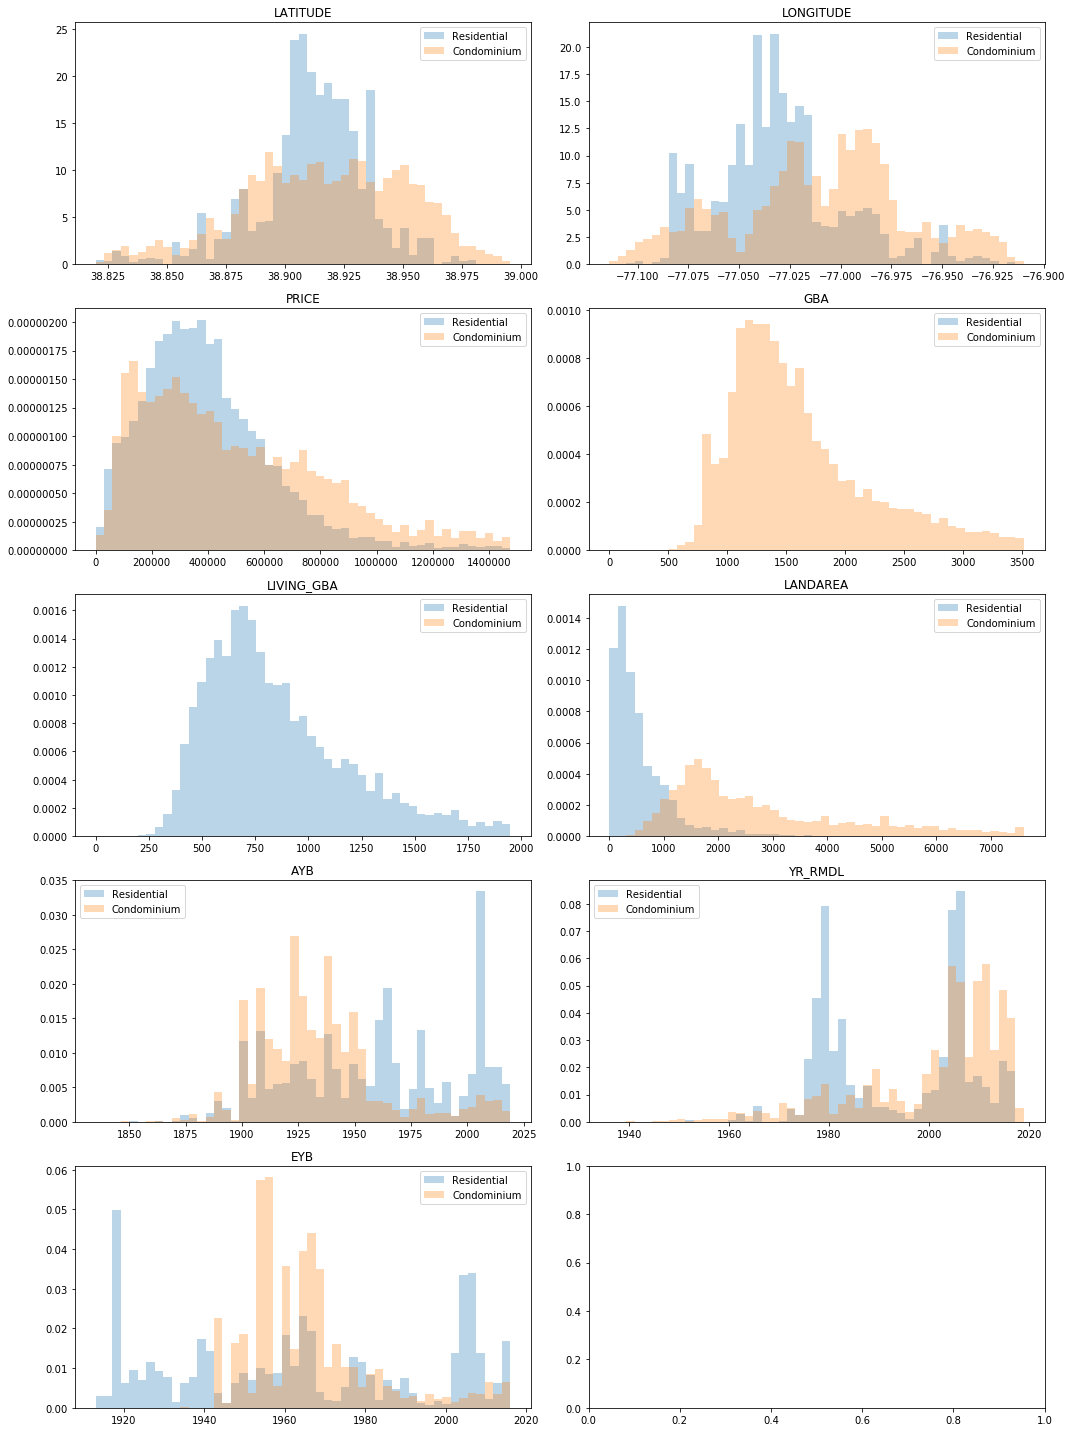

In [106]:
f,axes = plt.subplots(len(float_vars)//2+len(float_vars)%2,2,figsize=(15,len(float_vars)//2*5))
axes = np.ravel(axes)
for ax,col in zip(axes,float_vars):
    tmp_data = df.loc[:,col]
    lower,upper = outlier_range(tmp_data,2,True)
    
    tmp_data_cond = tmp_data.loc[df.loc[:,'SOURCE'] == 'Residential'].dropna()
    tmp_data_res = tmp_data.loc[df.loc[:,'SOURCE'] == 'Condominium'].dropna()
    
    bins = np.linspace(lower,upper,50)
    
    
    ax.hist(tmp_data_res,alpha=0.3,bins=bins,density=True)
    ax.hist(tmp_data_cond,alpha=0.3,bins=bins,density=True)
    ax.legend(['Residential','Condominium'])
    ax.set_title(col)
    
plt.tight_layout()
plt.show()

In [122]:
sorted_vars = np.unique(float_vars + integer_vars + cat_vars + useless_vars + other_vars + date_vars)
useful_vars = np.unique(float_vars + integer_vars + cat_vars + date_vars)